In [26]:
import pandas as pd
#import pysam
from Bio.Seq import Seq
import gpplot
from copy import deepcopy
import seaborn as sns
import matplotlib.pyplot as plt
from poola import core as pool

In [27]:
in_path = '../Data/ExternalData/Nunez 2021/'
nunez_tiling_sgrna = pd.read_excel(in_path + '1-s2.0-S0092867421003536-mmc4.xlsx', 
                             sheet_name = 'Tiling protospacers',
                            skiprows = 3, header=0)
nunez_tiling_phenotype = pd.read_excel(in_path + '1-s2.0-S0092867421003536-mmc4.xlsx', 
                             sheet_name = 'CRISPRi-K562',
                            skiprows = 3, header=[0, 1])


In [28]:
nunez_tiling_sgrna.head()

,Unnamed: 0,gene,sequence
0,ACTR6_+_100592059,ACTR6,GCGAGCACATAGAGGGATCT
1,ACTR6_+_100592060,ACTR6,GTCGAGCACATAGAGGGATC
2,ACTR6_+_100592066,ACTR6,GCCTGCTTCGAGCACATAGA
3,ACTR6_+_100592067,ACTR6,GACCTGCTTCGAGCACATAG
4,ACTR6_+_100592092,ACTR6,GAGACTCTGTCACCTCCGAG


In [29]:
len(nunez_tiling_sgrna)

116085

In [30]:
nunez_tiling_sgrna = nunez_tiling_sgrna.rename(columns={'Unnamed: 0': 'ID'})
nunez_tiling_phenotype.head()

Unnamed: 0_level_0   Counts                                     \
                  id T0, Rep1 T0, Rep2 Tfinal, Rep1 Tfinal, Rep2   
0  ACTR6_+_100592059      957      826         1038          788   
1  ACTR6_+_100592060      758      739          945          914   
2  ACTR6_+_100592066      992      698         1021          922   
3  ACTR6_+_100592067      958      849          952         1023   
4  ACTR6_+_100592092      182      148          168          219   

                 Phenotype scores                          
  Tfinal, Rep2.1             Rep1      Rep2 ave_Rep1_Rep2  
0            NaN        -0.001747 -0.036016     -0.018881  
1            NaN         0.017515  0.001070      0.009292  
2            NaN        -0.009000  0.010468      0.000734  
3            NaN        -0.013854 -0.002658     -0.008256  
4            NaN        -0.024057  0.026685      0.001314

In [33]:
len(nunez_tiling_phenotype)

116085

In [31]:
nunez_tiling_phenotype.columns = [f'{i}-{j}' for i, j in nunez_tiling_phenotype.columns]
nunez_tiling_phenotype = nunez_tiling_phenotype.rename(columns={'Unnamed: 0_level_0-id': 'ID'})
nunez_tiling = pd.merge(nunez_tiling_sgrna, nunez_tiling_phenotype, on = 'ID')

In [32]:
nunez_tiling.head()

,ID,gene,sequence,"Counts-T0, Rep1","Counts-T0, Rep2","Counts-Tfinal, Rep1","Counts-Tfinal, Rep2","Counts-Tfinal, Rep2.1",Phenotype scores-Rep1,Phenotype scores-Rep2,Phenotype scores-ave_Rep1_Rep2
0,ACTR6_+_100592059,ACTR6,GCGAGCACATAGAGGGATCT,957,826,1038,788,NaN,-0.001747,-0.036016,-0.018881
1,ACTR6_+_100592060,ACTR6,GTCGAGCACATAGAGGGATC,758,739,945,914,NaN,0.017515,0.001070,0.009292
2,ACTR6_+_100592066,ACTR6,GCCTGCTTCGAGCACATAGA,992,698,1021,922,NaN,-0.009000,0.010468,0.000734
3,ACTR6_+_100592067,ACTR6,GACCTGCTTCGAGCACATAG,958,849,952,1023,NaN,-0.013854,-0.002658,-0.008256
4,ACTR6_+_100592092,ACTR6,GAGACTCTGTCACCTCCGAG,182,148,168,219,NaN,-0.024057,0.026685,0.001314


In [9]:
nunez_tiling.drop('Counts-Tfinal, Rep2.1', axis=1, inplace=True)

In [10]:
nunez_tiling.columns

Index(['ID', 'gene', 'sequence', 'Counts-T0, Rep1', 'Counts-T0, Rep2',
       'Counts-Tfinal, Rep1', 'Counts-Tfinal, Rep2', 'Phenotype scores-Rep1',
       'Phenotype scores-Rep2', 'Phenotype scores-ave_Rep1_Rep2'],
      dtype='object')

#### growth phenotype is defined in the supple figure 1 of gilbert 2014

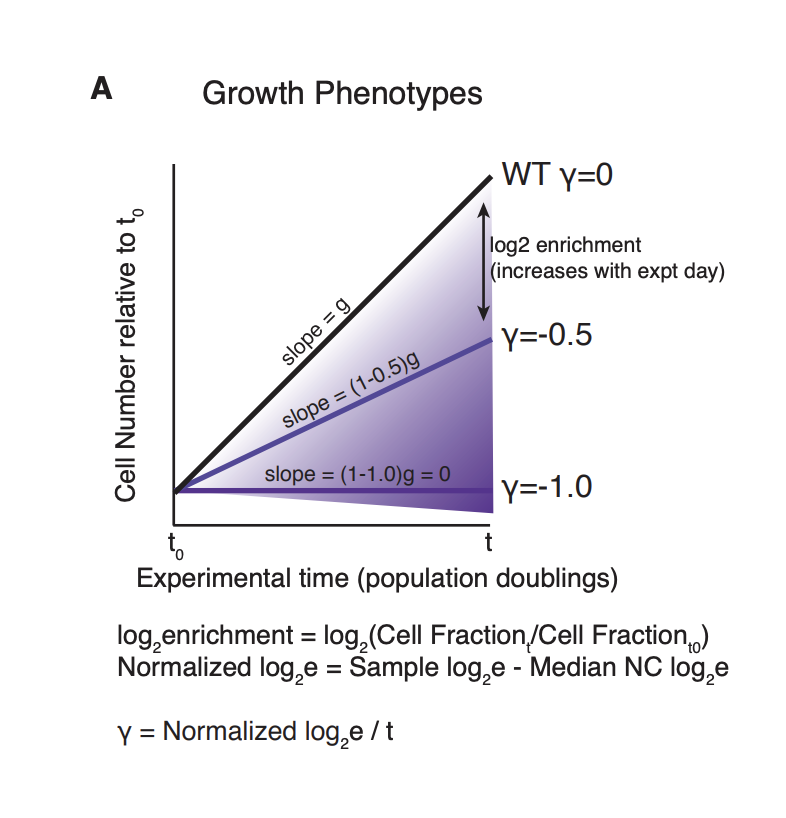

In [11]:
# remove nas
nunez_tiling_rm_na = nunez_tiling[['ID','gene','sequence','Phenotype scores-ave_Rep1_Rep2']].dropna().copy()

In [12]:
# remove neg controls
nunez_tiling_rm_nc = nunez_tiling_rm_na[nunez_tiling_rm_na.gene != 'negative_control'].copy()

In [13]:
# split the column
nunez_tiling_rm_nc['strand'] = nunez_tiling_rm_nc.ID.str.split("_").str[1]
nunez_tiling_rm_nc['coord'] = nunez_tiling_rm_nc.ID.str.split("_").str[2]

In [14]:
# length of the guide
nunez_tiling_rm_nc.sequence.map(len).value_counts()

sequence
20    111504
Name: count, dtype: int64

In [15]:
len(nunez_tiling_rm_nc.gene.unique())

520

In [16]:
pd.DataFrame(nunez_tiling_rm_nc.gene.unique()).to_csv('../Data/ExternalData/Nunez 2021/CRISPick/gene_set.csv',
                                                     index = False, header = None)

In [17]:
# import whole genome
# need to have hg38.fa.gz.fai and hg38.fa.gz.gzi in the same directory
# you can get this file on UCSC
genome = pysam.Fastafile(filename="../../../../../../../../Comp Data Sets/Reference Genomes/Human-hg38/hg38.fa.gz")

NameError: name 'pysam' is not defined

Nunez has sgRNA(20nts), guide ID(ACTR6_+_100592059, 100592059 seems to be some info about the postion of the guide), gene name, phenotype meterics. In order to perform all the analysis in the pipline, I need to collect information of the start and end postion of the guide and find the context sequence. Here are some steps I have taken and trouble shoot.

##### some problems I have encountered so far
First I want to match the guide to the whole genome to get all the missing information
1. I tried to blat the seq using ucsc hg38 and hg19 and it doesn't match to anything
2. guide ID seems to offer information about the coordinate(ex: 100592059 in ACTR6_+_100592059), so I used the downloaded whole genome hg38, found the +- 30 base around the the coordinate, and matched the guide to the genome and its reverse complement. However, still no match is generated.
3. I reached out to Sarra for help. We tried NCBI blast for the guide. However, NCBI shows guide has a lot of matchs and isn't matching to its orginal gene.
4. Sarra helped me to take a deeper look at the sequence and she found out the library is actually deisgned with the hg19 genome build and when matching the guide I need to remove the first G. 

Using what i learnt above, I performed the following steps To get the context sequence and guide position
Ran CRISPick on the set of 520 genes to get the chromosome number for each gene. Among these, three genes (EFTUD1, QARS, SARS) were invalid in CRISPick due to "Multiple genes matching."  EFTUD1 is a novel transcript and exact matches for QARS and SARS couldn't be located in the Ensembl database. These genes were excluded, resulting in a set of 517 genes. Note: 20 genes had different gene symbols in CRISPick.

1. Used liftover to find the coordinates in the guide IDs within the hg38 build. Note, 3863 coordinates were not present in the hg38 build and guide ID with those coodinates were removed.
2. Removed the initial "g" nucleotide from all the guides.
3. Used the downloaded hg38 whole genome to identify the sgRNA without the "g,".  Depending on the strand and using the coordinates from the guide IDs:
- If the strand is "-", the start was determined as "coord - 21" and the end as "coord - 2."
- If the strand is "+", the start was set as "coord + 3" and the end as "coord + 22." In this case, reverse complementing was applied.
4. Matched results from step 4 to step 3.  I found 507 instances where steps 4 and 3 did not align.
5. Removed the mismatches and negative controls.
6. Queried the downloaded hg38 whole genome to retrieve the context sequences.
7. Verified whether the PAM sequence ended with "GG." There are 4 exceptions.
8. removed these four sequences, 



In [ ]:
# import crispick results to get gene chr 
gene_crispick = pd.read_table('../Data/ExternalData/Nunez 2021/CRISPick/gene-set-sgrna-designs.txt')


{'ATP5B',
 'ATP5F1B',
 'C12orf45',
 'C14orf166',
 'CARS',
 'CARS1',
 'CD3EAP',
 'DARS',
 'DARS1',
 'DIEXF',
 'EFTUD1',
 'MICOS10',
 'MICOS10-NBL1',
 'MINOS1',
 'MINOS1-NBL1',
 'MKI67IP',
 'MRP63',
 'MRPL57',
 'NARS',
 'NARS1',
 'NDNL2',
 'NIFK',
 'NOPCHAP1',
 'NSMCE3',
 'PHB',
 'PHB1',
 'POLR1G',
 'POLR1H',
 'PRELID3B',
 'QARS',
 'RARS',
 'RARS1',
 'RTRAF',
 'SARS',
 'SGO1',
 'SGOL1',
 'SLMO2',
 'UTP25',
 'VARS',
 'VARS1',
 'YAE1',
 'YAE1D1',
 'ZNRD1'}
 
 those genes have differnt name in CRISPick and CRISPRi
 
 
 can directly combine the the gene name as the output of CRISPick is the same as the inputs

In [ ]:
#need to find chrom for genes have differnt name in CRISPick and CRISPRi
miss_gene = set(nunez_tiling_rm_nc.gene.unique()) ^ set(set(gene_crispick['Target Gene Symbol']) & 
                                                set(nunez_tiling_rm_nc.gene.unique()))
# number of genes have differnt name in CRISPick and CRISPRi
len(miss_gene)

In [ ]:
gene_set= pd.read_csv('../Data/ExternalData/Nunez 2021/CRISPick/gene_set.csv', header = None)
gene_set = gene_set[~gene_set[0].isin(['EFTUD1', 'QARS', 'SARS'])][0].dropna().tolist()
# EFTUD1 is a novel transcript and coundn't find the exact match for QARS and SARS
gene_crispick['input gene'] = gene_set

In [ ]:
# new name for the updated gene name
merge_gene_name = gene_crispick[['Target Gene Symbol', 'input gene']].copy()
merge_gene_name[merge_gene_name['input gene'].isin(miss_gene)]

In [ ]:
gene_crispick = gene_crispick[['Target Gene Symbol', 'input gene', 'Reference Sequence']]

In [ ]:
gene_crispick.loc[:,'chromosome'] = 'chr' + gene_crispick['Reference Sequence'].str.split("_").str[1].str.split(".").str[0].str[4:6].astype(int).astype(str)

In [ ]:
merged_tiling = pd.merge(gene_crispick, nunez_tiling_rm_nc, left_on = 'input gene', right_on = 'gene', how = 'inner')
merged_tiling.gene.value_counts()

In [ ]:
merged_tiling['liftover'] = merged_tiling['chromosome'] + ':' + merged_tiling['coord'] + '-' + merged_tiling['coord']

In [ ]:
# import error file from liftover and remove it from the current dataset
err_file = pd.read_table('../Data/ExternalData/Nunez 2021/liftover/hglft_genome_1316f_cb3530.err', header = None)
new_merged_tiling = merged_tiling[~merged_tiling['liftover'].isin(err_file[0])]
new_merged_tiling = new_merged_tiling.sort_index().reset_index(drop=True)

In [ ]:
len(err_file)/2

In [ ]:
len(merged_tiling)

In [ ]:
# import liftover result for hg19 to hg38
hg38_coord = pd.read_table('../Data/ExternalData/Nunez 2021/liftover/liftover_result.bed', header = None)

In [ ]:
# add hg38 annotation
new_merged_tiling['hg38_coord'] = hg38_coord[0].str.split('-').str[1]

###### play around to find rules for seq

In [ ]:
new_merged_tiling[new_merged_tiling.gene == 'ACTR6']

In [ ]:
#if strand is -
# then start: coord - 21 | end: coord - 2
pos_strand_ex = genome.fetch("chr12", 100203198 - 25, 100203198 +4)
print(pos_strand_ex)

In [ ]:
#if strand is +
# then start: coord + 3 | end: coord + 22
pos_strand_ex = genome.fetch("chr12", 100198281+3 , 100198281 +22)
seq = Seq(pos_strand_ex)
print(seq.reverse_complement())

##### apply the rules to the entire dataset

In [ ]:
new_merged_tiling['seq_remove_g'] = new_merged_tiling.sequence.str[1:]

In [ ]:
new_merged_tiling['hg38_coord'] = new_merged_tiling['hg38_coord'].astype(int)

In [ ]:
new_merged_tiling

In [ ]:
# The 30nt context sequence (assuming 20nt guide)
# +4nt from 5' end
# NGG
# +3 from 3' end 

# the guide is techniqucally 19 nts so 
# +5nt from 5' end
# NGG
# +3 from 3' end 

start_coords = []
end_coords = []
guide_inx_mismatch = []
context_seq = []
for index, row in new_merged_tiling.iterrows():
    if row['strand'] == '+':
        start = row['hg38_coord'] + 3
        end = row['hg38_coord'] + 22
        start_coords.append(start)
        end_coords.append(end)
        pos_strand_ex = genome.fetch(row['chromosome'], start , end)
        seq = Seq(pos_strand_ex)
        reverse_comp_strand = seq.reverse_complement()
        
        if reverse_comp_strand.upper() != row['seq_remove_g'].upper():
            print('wrong matching; need to fix something')
            print(reverse_comp_strand)
            print(row['seq_remove_g'])
            guide_inx_mismatch.append(index)
    if row['strand'] == '-':
        start = row['hg38_coord'] - 21
        end = row['hg38_coord'] - 2
        start_coords.append(start)
        end_coords.append(end)
        pos_strand_ex = genome.fetch(row['chromosome'], start , end)
        if pos_strand_ex.upper() != row['seq_remove_g'].upper():
            print('wrong matching; need to fix something')
            print(pos_strand_ex)
            print(row['seq_remove_g'])
            guide_inx_mismatch.append(index)
        

        

In [ ]:
new_merged_tiling[new_merged_tiling['seq_remove_g'] == 'GCGAGGCCTACGCTGCAGT']

In [ ]:
len(guide_inx_mismatch)

In [ ]:
# matched sequence
len(new_merged_tiling)-len(guide_inx_mismatch)

In [ ]:
new_merged_tiling['start_coord_hg38'] = start_coords
new_merged_tiling['end_coord_hg38'] = end_coords

In [ ]:
# remove indexs that didn't match
new_merged_tiling = new_merged_tiling.drop(guide_inx_mismatch)

In [ ]:
new_merged_tiling

In [ ]:
# The 30nt context sequence (assuming 19nt guide)
# +5nt from 5' end
# NGG
# +3 from 3' end 

In [ ]:
# reverse complement 
context_seq = []
ngg_check = []
for index, row in new_merged_tiling.iterrows():
    if row['strand'] == '+':
        pos_strand_ex = genome.fetch(row['chromosome'], row['start_coord_hg38'] - 6 , row['end_coord_hg38'] +5 )
        seq = Seq(pos_strand_ex)
        reverse_comp_strand = seq.reverse_complement()
        context_seq.append(str(reverse_comp_strand))
        ngg_check.append(reverse_comp_strand[25:27].upper() == 'GG')
    if row['strand'] == '-':
        pos_strand_ex = genome.fetch(row['chromosome'], row['start_coord_hg38'] - 5 , row['end_coord_hg38'] +6 )
        context_seq.append(pos_strand_ex)
        ngg_check.append(pos_strand_ex[25:27].upper() == 'GG')

    

In [ ]:
sum([item[25:27].upper() != 'GG' for item in context_seq])


In [ ]:
[item[25:27] for item in context_seq if item[25:27].upper() != 'GG']

In [ ]:
# complement
# context_seq = []
# for index, row in new_merged_tiling.iterrows():
#     if row['strand'] == '+':
#         pos_strand_ex = genome.fetch(row['chromosome'], row['start_coord_hg38'] - 5 , row['end_coord_hg38'] +6 )
#         seq = Seq(pos_strand_ex)
#         reverse_comp_strand = seq.complement()
#         context_seq.append(reverse_comp_strand)
#     if row['strand'] == '-':
#         pos_strand_ex = genome.fetch(row['chromosome'], row['start_coord_hg38'] - 5 , row['end_coord_hg38'] +6 )
#         context_seq.append(pos_strand_ex)

In [ ]:
#sum([item[25:27].upper() != 'GG' for item in context_seq])
#47887

In [ ]:
# # reverse
# context_seq = []
# for index, row in new_merged_tiling.iterrows():
#     if row['strand'] == '+':
#         pos_strand_ex = genome.fetch(row['chromosome'], row['start_coord_hg38'] - 6 , row['end_coord_hg38'] +5 )
#         seq = Seq(pos_strand_ex)
#         reverse_comp_strand = seq.reverse_complement().complement()
#         context_seq.append(str(reverse_comp_strand))
#     if row['strand'] == '-':
#         pos_strand_ex = genome.fetch(row['chromosome'], row['start_coord_hg38'] - 5 , row['end_coord_hg38'] +6 )
#         context_seq.append(pos_strand_ex)

# # reverse
# sum([item[25:27].upper() != 'GG' for item in context_seq])
# 53238

In [ ]:
# # as it is 
# context_seq = []
# for index, row in new_merged_tiling.iterrows():
#     if row['strand'] == '+':
#         pos_strand_ex = genome.fetch(row['chromosome'], row['start_coord_hg38'] - 5 , row['end_coord_hg38'] +6 )
#         seq = Seq(pos_strand_ex)
#         reverse_comp_strand = seq.reverse_complement().complement()
#         context_seq.append(reverse_comp_strand)
#     if row['strand'] == '-':
#         pos_strand_ex = genome.fetch(row['chromosome'], row['start_coord_hg38'] - 5 , row['end_coord_hg38'] +6 )
#         context_seq.append(pos_strand_ex)

# #  as it is 
# sum([item[25:27].upper() != 'GG' for item in context_seq])
# 53238

In [ ]:
new_merged_tiling['context_seq'] = context_seq
new_merged_tiling['ngg_check'] = ngg_check

In [ ]:
new_merged_tiling[new_merged_tiling['ngg_check'] == False]

In [ ]:
# only kept the ones with ngg pam
new_merged_tiling = new_merged_tiling[new_merged_tiling['ngg_check'] == True]

In [ ]:
# There is NO DUPLICATED sgRNA within the same gene 
new_merged_tiling[new_merged_tiling[['Target Gene Symbol', 'context_seq']].duplicated(keep = False)]

In [ ]:
# There are duplicated context seq accross genes
dupliated_df = new_merged_tiling[new_merged_tiling[['context_seq']].duplicated(keep = False)]
dupliated_df[dupliated_df.context_seq == 'CCTCAAAGAGATCAAGATGGGCAGTGGTGG']

In [ ]:
# drop duplicates and only keep the first one
new_merged_tiling = new_merged_tiling.drop_duplicates(['context_seq'], keep = 'first')
new_merged_tiling= new_merged_tiling[['ID','Target Gene Symbol', 'chromosome','strand','sequence', 'context_seq','hg38_coord', 'start_coord_hg38',
       'end_coord_hg38','Phenotype scores-ave_Rep1_Rep2']]

# Now i want to calcuate LFC 

In [ ]:
# use count to calcuate LFC: remove T0 with z-score less than -3
lognorms_nunez_tiling = pool.lognorm_columns(reads_df=nunez_tiling, columns=['Counts-T0, Rep1', 'Counts-T0, Rep2', 
                                                                          'Counts-Tfinal, Rep1', 'Counts-Tfinal, Rep2'])
filtered_lognorms_nunez_tiling = pool.filter_pdna(lognorm_df=lognorms_nunez_tiling, 
                                                  pdna_cols=['Counts-T0, Rep1', 'Counts-T0, Rep2'], z_low=-3)
print('Filtered ' + str(lognorms_nunez_tiling.shape[0] - filtered_lognorms_nunez_tiling.shape[0]) + ' rows due to low pDNA abundance')


In [ ]:
# use count to calcuate LFC: check lognorms of T0 repeats correlation 
plt.subplots(figsize=(4,4))
gpplot.point_densityplot(data=filtered_lognorms_nunez_tiling, x='Counts-T0, Rep1', y='Counts-T0, Rep2')
gpplot.add_correlation(data=filtered_lognorms_nunez_tiling, x='Counts-T0, Rep1', y='Counts-T0, Rep2')
sns.despine()

In [ ]:
# use count to calcuate LFC: find average lognorms of T0 because they corrlate well
filtered_lognorms_nunez_tiling['Avg Counts-T0'] = filtered_lognorms_nunez_tiling[['Counts-T0, Rep1', 'Counts-T0, Rep2']].mean(axis=1)
# use count to calcuate LFC: calcuate LFC relative to the averaged T0 lognmorm 
lfc_nunez_tiling = pool.calculate_lfcs(lognorm_df=filtered_lognorms_nunez_tiling, 
                                         ref_col='Avg Counts-T0', 
                                       target_cols=['Counts-Tfinal, Rep1', 'Counts-Tfinal, Rep2'])
#  check LFC of Tfinal repeats correlation 
plt.subplots(figsize=(4,4))
gpplot.point_densityplot(data=lfc_nunez_tiling, x='Counts-Tfinal, Rep1', y='Counts-Tfinal, Rep2')
gpplot.add_correlation(data=lfc_nunez_tiling, x='Counts-Tfinal, Rep1', y='Counts-Tfinal, Rep2')
sns.despine()

In [ ]:
# find average LFC of Tfinal because they corrlate well
lfc_nunez_tiling['Avg_LFC-Tfinal'] = lfc_nunez_tiling[['Counts-Tfinal, Rep1', 'Counts-Tfinal, Rep2']].mean(axis=1)
# calcuate z-score relative to neg control
nc_mean = lfc_nunez_tiling[lfc_nunez_tiling.gene == 'negative_control']['Avg_LFC-Tfinal'].mean()
nc_mean_std = lfc_nunez_tiling[lfc_nunez_tiling.gene == 'negative_control']['Avg_LFC-Tfinal'].std()
lfc_nunez_tiling['z-score relative to NC'] = (lfc_nunez_tiling['Avg_LFC-Tfinal'] - nc_mean)/nc_mean_std

In [ ]:
lfc_nunez_tiling_cleaned = lfc_nunez_tiling.dropna()
lfc_nunez_tiling_cleaned = lfc_nunez_tiling_cleaned[['ID', 'gene', 'sequence','Phenotype scores-ave_Rep1_Rep2',
       'Avg_LFC-Tfinal', 'z-score relative to NC']]

In [ ]:
# can use ID to merge because it is unique
lfc_nunez_tiling_cleaned['ID'].value_counts()

In [ ]:
lfc_nunez_tiling_cleaned

In [ ]:
final_clean = pd.merge(new_merged_tiling, 
         lfc_nunez_tiling_cleaned.rename(columns = {'gene': 'Target Gene Symbol'}), 
         on = ['ID', 'Target Gene Symbol', 'sequence','Phenotype scores-ave_Rep1_Rep2'])

final_clean

In [ ]:
final_clean.to_csv('../Data/CleanedExternalData/Nunez2020Cleaned2024_v1.csv',
                    index = False)

